In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sys
import config

sys.path.append('model_building/create_image_folders.py')
from model_building.create_image_folders import * 
sys.path.append('model_building/cnn_model_keras.py')
from model_building.cnn_model_keras import *

import warnings
warnings.simplefilter("ignore", UserWarning)


## Load Data

In [2]:
## Set paths
img_folder = "/home/jovyan/my_work/QB/image/images/"
train_img = "/home/jovyan/my_work/QB/image/train/"
val_img = "/home/jovyan/my_work/QB/image/val/"
labels_image = "data/x-ai_data.csv"

## Create Subfolder

Use the fonction "subfolders" to do the same thing as the cells below, DO NOT run it twice to avoid duplicates

In [3]:
labels_image = pd.read_csv(labels_image)
train = labels_image.loc[labels_image['split']=='train']
val = labels_image.loc[labels_image['split']=='validation']

In [4]:
train0 = train.loc[train['class']==0]
train1 = train.loc[train['class']==1]

val0 = val.loc[val['class']==0]
val1 = val.loc[val['class']==1]


In [41]:
#Move TRAIN images labeled 0 to the correct folder

for i in train0.index:
    im = cv2.imread(img_folder+train0.loc[i,'filename'])
    cv2.imwrite(train_img + '0/' +train0.loc[i,'filename'], im)
#Move TRAIN images labeled 1 to the correct folder
for i in train1.index:
    im = cv2.imread(img_folder+train1.loc[i,'filename'])
    cv2.imwrite(train_img+'1/' +train1.loc[i,'filename'], im)

In [40]:
#Move val images labeled 0 to the correct folder
for i in val0.index:
    im = cv2.imread(img_folder+val0.loc[i,'filename'])
    cv2.imwrite(val_img + '0/' +val0.loc[i,'filename'], im)
#Move val images labeled 1 to the correct folder
for i in val1.index:
    im = cv2.imread(img_folder+val1.loc[i,'filename'])
    cv2.imwrite(val_img+'1/' +val1.loc[i,'filename'], im)

In [63]:
import shutil

#Remove hidden file
shutil.rmtree("image/train/.ipynb_checkpoints")
shutil.rmtree("image/val/.ipynb_checkpoints")

## Model

In [5]:
## Train and Val dataset
train_ds = train_set(train_img, config.image_size, config.batch_size)
val_ds = val_set(val_img, config.image_size, config.batch_size)

Found 1400 files belonging to 2 classes.
Using 1330 files for training.
Found 400 files belonging to 2 classes.
Using 20 files for validation.


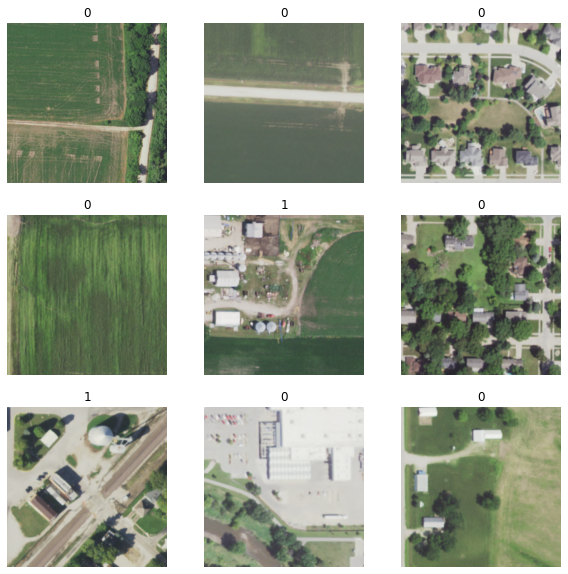

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
## Model
model = make_model(input_shape=config.image_size + (3,), num_classes=2)

In [7]:
train_model(model, train_ds, val_ds, 2)

Epoch 1/2
42/42 [==============================] - 14s 298ms/step - loss: 0.5158 - accuracy: 0.7729 - val_loss: 0.7677 - val_accuracy: 0.3500
Epoch 2/2
42/42 [==============================] - 12s 283ms/step - loss: 0.4706 - accuracy: 0.7947 - val_loss: 0.7974 - val_accuracy: 0.3500


In [18]:
model.save("model2.h5")

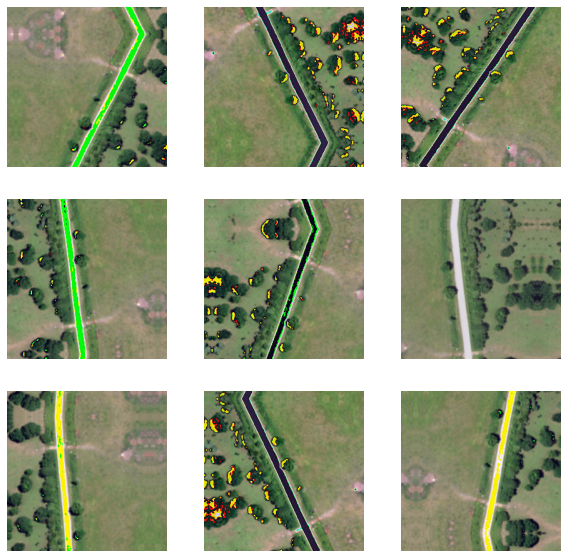

In [53]:
#visualize data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomContrast([0,1]),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
    ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## try test set

In [7]:
labels_image = pd.read_csv(labels_image)

test = labels_image.loc[labels_image['split']=='test']
test

,filename,class,split
15,silos_256-0-0--6-15--912-29899.png,0,test
48,silos_256-0-0--6-15--1466-30208.png,0,test
52,silos_256-0-0--6-15--1313-29720.png,0,test
53,silos_256-0-0--6-15--48-31242.png,0,test
60,silos_256-0-0--6-15--334-30397.png,0,test
...,...,...,...
1952,silos_256-0-0--6-16--953-31674.png,1,test
1956,silos_256-0-0--6-16--1134-30982.png,1,test
1959,silos_256-0-0--6-16--1204-28816.png,1,test
1966,silos_256-0-0--6-14--33-30848.png,1,test


In [8]:
test_img = "/home/jovyan/my_work/QB/image/test/"
#Inside the test folder create another test folder

In [ ]:
#Move TEST images to the correct folder
for i in test.index:
    im = cv2.imread(img_folder+test.loc[i,'filename'])
    cv2.imwrite(test_img + 'test/' + test.loc[i,'filename'], im)

In [29]:
import shutil

shutil.rmtree("image/test/.ipynb_checkpoints")

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
  
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_img,
    target_size=(256, 256),
    batch_size=config.batch_size,
    class_mode='binary')

Found 1400 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
    val_img,
    target_size=(256, 256),
    batch_size=config.batch_size,
    class_mode='binary')

Found 400 images belonging to 2 classes.


In [18]:
model.fit_generator(
    train_generator,
    steps_per_epoch=1400 // config.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=400 // config.batch_size)

Epoch 1/5


2022-12-06 14:43:13.448796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2022-12-06 14:43:14.034098: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 14:43:14.138249: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 14:43:14.138375: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-06 14:43:14.141765: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-06 14:43:14.141986: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


43/43 [==============================] - 36s 767ms/step - loss: 0.8185 - accuracy: 0.5227 - val_loss: 0.6881 - val_accuracy: 0.6641
Epoch 2/5
43/43 [==============================] - 32s 760ms/step - loss: 0.6931 - accuracy: 0.5643 - val_loss: 0.6752 - val_accuracy: 0.5547
Epoch 3/5
43/43 [==============================] - 34s 794ms/step - loss: 0.6819 - accuracy: 0.5826 - val_loss: 0.6523 - val_accuracy: 0.6667
Epoch 4/5
43/43 [==============================] - 34s 776ms/step - loss: 0.6646 - accuracy: 0.6155 - val_loss: 0.6319 - val_accuracy: 0.6276
Epoch 5/5
43/43 [==============================] - 33s 780ms/step - loss: 0.6484 - accuracy: 0.6455 - val_loss: 0.5928 - val_accuracy: 0.6797


In [19]:
from tensorflow.keras.models import load_model

model.save("model3.h5")
model3 = load_model("model3.h5")

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

image = load_img('my_work/QB/image/test/silos_256-0-0--6-16-472-29195.png', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)
label = model.predict(img)
print("Predicted Class (0 - No Silo , 1- Silo): ", label[0][0])

In [30]:
test_generator = test_datagen.flow_from_directory(
    test_img,
    target_size=(256, 256),
    batch_size=config.batch_size,
    class_mode=None,
    shuffle=False
    )

Found 200 images belonging to 1 classes.


In [31]:
test_generator.reset()

In [32]:
predictions = model3.predict_generator(test_generator,verbose=1,steps=200/config.batch_size)
predictions

6/6 [==============================] - 2s 262ms/step


array([[0.32652223],
       [0.30626124],
       [0.4268235 ],
       [0.2408761 ],
       [0.29317155],
       [0.16386661],
       [0.25072035],
       [0.52199554],
       [0.623649  ],
       [0.29450577],
       [0.6618309 ],
       [0.51634103],
       [0.2686967 ],
       [0.6868698 ],
       [0.37784052],
       [0.42652756],
       [0.3408564 ],
       [0.23070958],
       [0.4327909 ],
       [0.40475476],
       [0.56240004],
       [0.6292866 ],
       [0.5693444 ],
       [0.17910057],
       [0.1976856 ],
       [0.30768445],
       [0.316474  ],
       [0.56387067],
       [0.6163396 ],
       [0.5430711 ],
       [0.6379544 ],
       [0.19760783],
       [0.20536593],
       [0.32737607],
       [0.36997908],
       [0.6162106 ],
       [0.51273954],
       [0.25467774],
       [0.44667614],
       [0.20656191],
       [0.1786803 ],
       [0.22207873],
       [0.31492615],
       [0.6819415 ],
       [0.57807624],
       [0.6851059 ],
       [0.19944027],
       [0.701

In [57]:
predicted_class_indices= np.round(predictions).astype(int)

In [60]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices[:,0]]

In [64]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [65]:
results

,Filename,Predictions
0,test/silos_256-0-0--6-14--33-30848.png,0
1,test/silos_256-0-0--6-14-1281-31369.png,0
2,test/silos_256-0-0--6-14-1293-30878.png,0
3,test/silos_256-0-0--6-14-1307-30792.png,0
4,test/silos_256-0-0--6-15--1014-29285.png,0
...,...,...
195,test/silos_256-0-0--6-16-195-29261.png,1
196,test/silos_256-0-0--6-16-244-29531.png,1
197,test/silos_256-0-0--6-16-26-28182.png,1
198,test/silos_256-0-0--6-16-333-29034.png,1
